<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/ProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
folder = '/content/drive/MyDrive/AI_Final/1010AnhDeTrain/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('man_01'):
     output= 1.0
  if file.startswith('man_003'):
    output= 2.0
  if file.startswith('man_10'):
    output= 3.0
  if file.startswith('man_11'):
    output= 4.0
  if file.startswith('man_15'):
    output= 5.0
  if file.startswith('man_20'):
    output= 6.0
  if file.startswith('man_22'):
    output= 7.0
  if file.startswith('man_28'):
    output= 8.0
  if file.startswith('man_32'):
    output= 9.0
  if file.startswith('man_36'):
    output= 10.0
  if file.startswith('man_40'):
    output= 11.0
  if file.startswith('man_47'):
    output= 12.0
  if file.startswith('man_60'):
    output= 13.0
  if file.startswith('woman_002'):
    output= 14.0
  if file.startswith('woman_04'):
    output= 15.0
  if file.startswith('woman_10'):
    output= 16.0
  if file.startswith('woman_11'):
    output= 17.0
  if file.startswith('woman_14'):
    output= 18.0
  if file.startswith('woman_15'):
    output= 19.0
  if file.startswith('woman_21'):
    output= 20.0
  if file.startswith('woman_22'):
    output= 21.0
  if file.startswith('woman_23'):
    output= 22.0
  if file.startswith('woman_25'):
    output= 23.0
  if file.startswith('woman_32'):
    output= 24.0
  if file.startswith('woman_38'):
    output= 25.0

  photo = load_img(folder + file, target_size= (96,72))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [6]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_Final/ThuMucLuuTru/NhanDien_photos.npy', photos)
save('/content/drive/MyDrive/AI_Final/ThuMucLuuTru/NhanDien_labels.npy', labels)

(1010, 96, 72, 3) (1010,)


In [7]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [10]:
print(test_x.shape, train_x.shape)

(50, 96, 72, 3) (960, 96, 72, 3)


In [11]:
train_x = train_x.reshape((960, 96, 72, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((50, 96, 72, 3))
test_x = test_x.astype('float32')/255

In [13]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,26)
test_y = to_categorical(test_y,26)

In [48]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 100
classes = 26

In [49]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (96, 72, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [50]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 96, 72, 32)        896       
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 96, 72, 32)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 48, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 48, 36, 64)        18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 48, 36, 64)        36928     
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 48, 36, 64)        0         
                                                      

In [72]:

#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
15/15 [==============================] - 4s 43ms/step - loss: 0.1194 - accuracy: 0.9448
Epoch 2/100
15/15 [==============================] - 1s 37ms/step - loss: 0.2310 - accuracy: 0.9240
Epoch 3/100
15/15 [==============================] - 1s 38ms/step - loss: 0.1945 - accuracy: 0.9177
Epoch 4/100
15/15 [==============================] - 1s 37ms/step - loss: 0.1819 - accuracy: 0.9344
Epoch 5/100
15/15 [==============================] - 1s 37ms/step - loss: 0.1639 - accuracy: 0.9375
Epoch 6/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0971 - accuracy: 0.9521
Epoch 7/100
15/15 [==============================] - 1s 40ms/step - loss: 0.0948 - accuracy: 0.9563
Epoch 8/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0941 - accuracy: 0.9604
Epoch 9/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0778 - accuracy: 0.9635
Epoch 10/100
15/15 [==============================] - 1s 37ms/step - loss: 0.1108 - accuracy: 0.9563

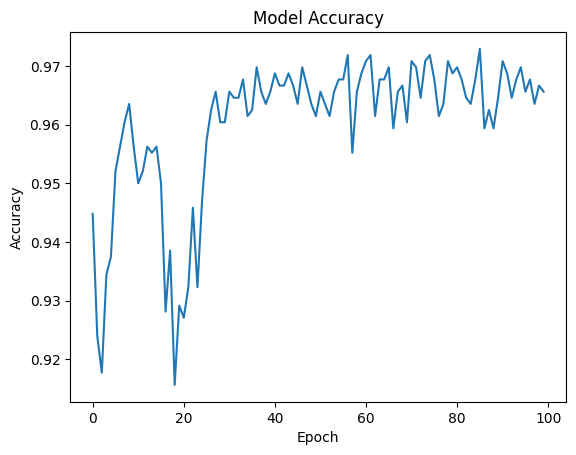

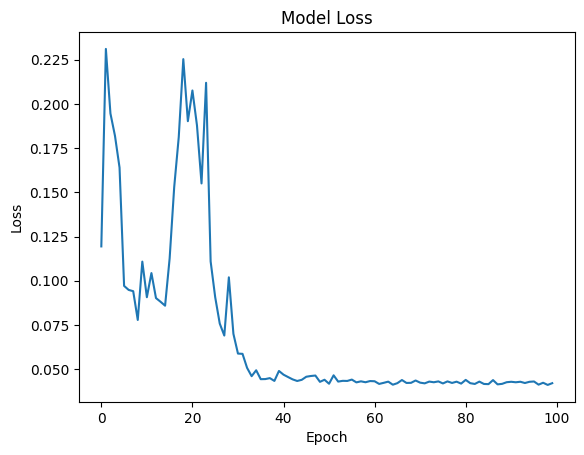

In [81]:
# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(train.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [75]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 14ms/step - loss: 5.1559 - accuracy: 0.3800
Test accuracy: 0.3799999952316284


In [77]:
model.save('/content/drive/MyDrive/AI_Final/ThuMucLuuTru/Data_DuDoanModel_tien.h5')

1/1 [==============================] - 0s 102ms/step
3
day la con trai 10


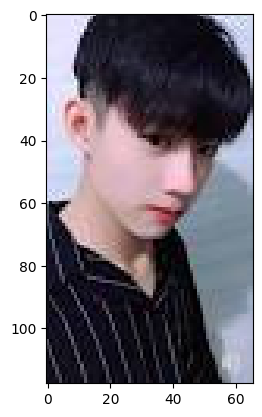

1/1 [==============================] - 0s 30ms/step
21
day la em gai xinh dep tuoi 22


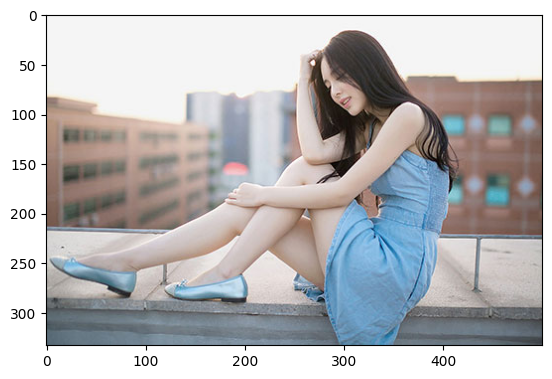

1/1 [==============================] - 0s 30ms/step
20
day la em gai xinh dep tuoi 21


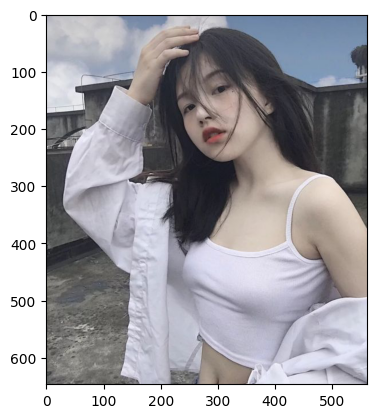

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_Final/ThuMucTest/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (96, 72))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', 'day la con trai 01', 'day la con trai 3', 'day la con trai 10', 'man_11', 'con trai 15', 'day la con trai 20 ', 'day la con trai 22', 'day la con trai 28', 'day la con trai 32', 'day la con trai 36', 'day la con trai 40', 'man_47','man_60','woman_002','day la em gai xinh dep tuoi 4','day la em gai xinh dep tuoi 10','day la em gai xinh dep tuoi 11','day la em gai xinh dep tuoi 14','day la em gai xinh dep tuoi 15','day la em gai xinh dep tuoi 21','day la em gai xinh dep tuoi 22','day la em gai xinh dep tuoi 23','day la em gai xinh dep tuoi 25','day la em gai xinh dep tuoi 32','day la em gai xinh dep tuoi 38']
  print(class_name[result])
  plt.show()